In [1]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from random import uniform

In [2]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def fit(self, X, y):
        # Initialize weights and biases to small random values
        self.weights = np.random.rand(X.shape[1])
        self.biases = np.random.rand(X.shape[1])

        # Loop through the number of iterations
        for i in range(self.num_iterations):
            # Loop through each example in the training set
            for x, label in zip(X, y):
                # Make a prediction using the current weights and biases
                prediction = self.predict(x)

                # Update the weights and biases if the prediction was incorrect
                if prediction != label:
                    error = label - prediction
                    self.weights += self.learning_rate * error * x
                    self.biases += self.learning_rate * error

    def predict(self, x):
        # Calculate the dot product of the input features and the weights
        dot_product = np.dot(x, self.weights) + np.dot(x, self.biases)

        # Return 1 if the dot product is positive, otherwise return 0
        return 1 if dot_product >= 0 else 0

In [3]:
def get_points_and_labels(amount, function_separator, x_range=14, y_range=14):
    points = []
    labels = []
    for _ in range(amount):
        x, y = uniform(0, x_range), uniform(0, y_range)
        label = 1 if y > function_separator(x) else 0
        points.append([x,y])
        labels.append(label)
    return np.array(points), np.array(labels)

def plot_points_and_labels(points, labels):
    for x, label in zip(points, labels):
        if label == 0:
            plt.scatter(x[0], x[1], color='r')
        else:
            plt.scatter(x[0], x[1], color='b')

def plot_function(function):
    x = np.linspace(0, 14)
    y = function(x)
    plt.plot(x, y, color="g")

#### linear separation

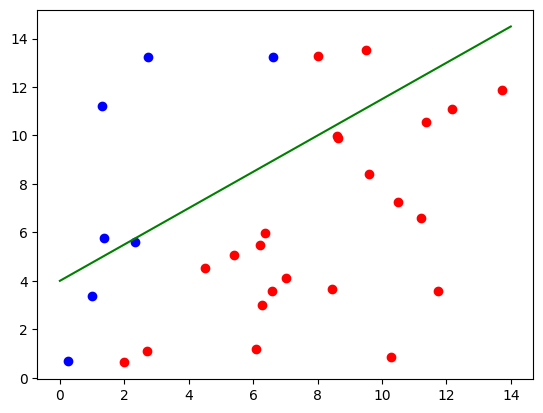

In [4]:
sep_fun = lambda x: 4 + .75 * x
X, Y = get_points_and_labels(60, sep_fun)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
p = Perceptron()
p.fit(X_train, Y_train)

predictions = []
for point in X_test:
    predictions.append(p.predict(point))
plot_function(sep_fun)
plot_points_and_labels(X_test, predictions)
# point = [5,6]
# Make a prediction for a new point


#### quadratic function separation

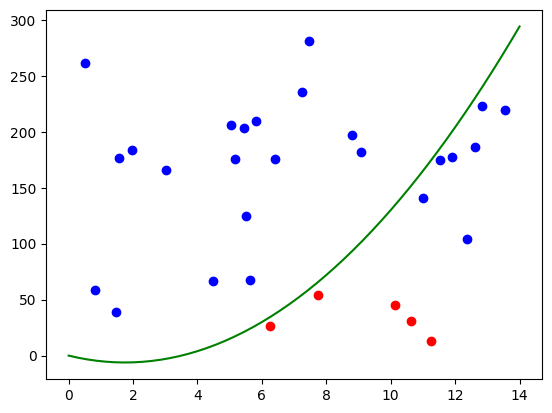

In [20]:
sep_fun = lambda x: x * x * 2 -7  *x
X, Y = get_points_and_labels(60, sep_fun, 14, sep_fun(14))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
p = Perceptron()
p.fit(X_train, Y_train)

predictions = []
for point in X_test:
    predictions.append(p.predict(point))
plot_function(sep_fun)
plot_points_and_labels(X_test, predictions)